In [1]:
%matplotlib inline
from neural_network import Network, Layer
from keras.datasets import mnist
from random import randrange
import matplotlib.pyplot as plt
import numpy as np

# Setup 
First, we create a neural network by instantiating a new neural network object and loading in the data. 

### Creating the network
Currently, we only have support for a dense neural network, and we can only use the sigmoid activation function.
Networks can contain any numbers of hidden layers with any number of nodes.

### Importing the data
For this example, we are going to use the MNIST data set to classify handwritten digits. MNIST contains 70,000 28 x 28 images of handwritten digits: 60,000 for training and 10,000 for testing.

11490434/11490434 [==============================] - 0s 0us/step


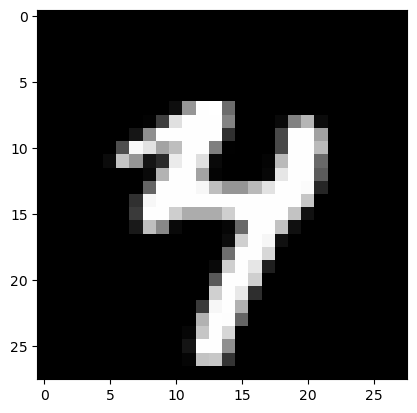

This image is a 4.


In [2]:
model = Network(layers=[Layer(784, 'sigmoid'),
                        Layer(64, 'sigmoid'),
                        Layer(64, 'sigmoid'),
                        Layer(10, 'sigmoid')])

(x_train, y_train), (x_test, y_test) = mnist.load_data()
digit = randrange(1, 60000)
plt.imshow(x_train[digit], cmap='gray', vmin=0, vmax=255)
plt.show()
print(f"This image is a {y_train[digit]}.")

# Finishing Setup

We are going to initialize our training sample size for standard gradient descent using the MSE loss function.

In [3]:
model.set_training_size(8000)

# Training
Next we train the network. The model will output the average loss for every 1000 training examples.

In [4]:
model.train()

Loss: 0.5128636803865454
Loss: 0.38496625480927954
Loss: 0.2996775942697104
Loss: 0.23985673706232155
Loss: 0.2132427353719946
Loss: 0.19230668586683314
Loss: 0.17840425515054398


# Testing
Next we are going to test the model will all 10,000 test examples.

In [5]:
correct = 0

for index in range(x_test.shape[0]):
    prediction = model.predict(x_test[index].flatten())
    if prediction.argmax() == y_test[index]:
        correct += 1
        
print(f"When training with {model.get_training_size()} examples, "
      f"our model's accuracy is {correct / y_test.shape[0]}.")


When training with 8000 examples, our model's accuracy is 0.8372.


[1.21698631e-10]
[0.9995506]
[2.65583069e-08]
[3.26197626e-06]
[3.39584685e-09]
[1.55504923e-06]
[3.06232016e-06]
[0.00017507]
[4.23713357e-05]
[8.89124195e-05]
The model predicts this is a 1
The label is 1.


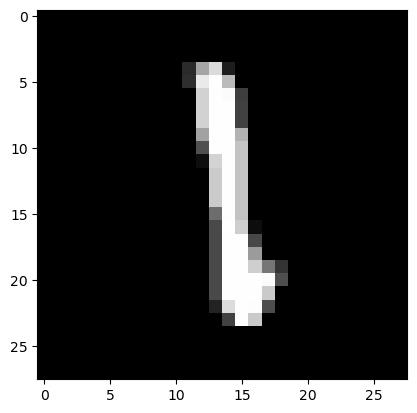

In [21]:
i = randrange(10000)

prediction = model.predict(x_test[i].flatten()).argmax()

model.display_output()
print(f"The label is {y_test[i]}.")
plt.imshow(x_test[i], cmap='gray', vmin=0, vmax=255)